In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
# r2_score is used when multiple independent columns are used to create a model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'DS1_C9_S7_Project_AbsenteeismAtWork_Data (1).csv',sep = ";")
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [4]:

df["Reason for absence"] = df["Reason for absence"].replace( {0: "None",
    1: "Certain infectious and parasitic diseases",

2: "Neoplasms",

3:"Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",

4: "Endocrine, nutritional and metabolic diseases",

5 :"Mental and behavioural disorders",

6: "Diseases of the nervous system",

7: "Diseases of the eye and adnexa",

8: "Diseases of the ear and mastoid process",

9: "Diseases of the circulatory system",

10: "Diseases of the respiratory system",
11: "Diseases of the digestive system",
12: "Diseases of the skin and subcutaneous tissue",

13 :"Diseases of the musculoskeletal system and connective tissue",

14: "Diseases of the genitourinary system",
15: "Pregnancy, childbirth and the puerperium",
16: "Certain conditions originating in the perinatal period",
17: "Congenital malformations, deformations and chromosomal abnormalities",
18: "Symptoms, signs and abnormal clinical and laboratory findings, notelsewhere classified",

19: "Injury, poisoning and certain other consequences of external causes",
20: "External causes of morbidity and mortality",

21: "Factors influencing health status and contact with health services.",
22: "patient follow-up",
23: "medical consultation",
24: "blood donation",
25: "laboratory examination", 
26: "unjustified absence",
27: "physiotherapy" ,
28:  "dental consultation"})





In [5]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df["Month of absence"] = df["Month of absence"].replace({1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
    0: "Unknown"})

In [7]:
df["Day of the week"] = df["Day of the week"].replace({2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday",
    1: "Sunday",   
    })

In [8]:
df["Seasons"] = df["Seasons"].replace({1: "summer",2:"autumn",3:"winter",4:"spring"})

In [9]:
df["Disciplinary failure"] = df["Disciplinary failure"].replace({0: "no",1:"yes"})

In [10]:
df["Education"] = df["Education"].replace({1: "high school",2:"graduate",3:"postgraduate",4:"master and doctor"})

In [11]:
df["Social drinker"] = df["Social drinker"].replace({0: "no",1:"yes"})

In [12]:
df["Social drinker"].value_counts

<bound method IndexOpsMixin.value_counts of 0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
735    yes
736     no
737    yes
738    yes
739     no
Name: Social drinker, Length: 740, dtype: object>

In [13]:
df["Social smoker"] = df["Social smoker"].replace({0: "no",1:"yes"})

In [14]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,unjustified absence,July,Tuesday,summer,289,36,13,33,239.554,...,no,high school,2,yes,no,1,90,172,30,4
1,36,None,July,Tuesday,summer,118,13,18,50,239.554,...,yes,high school,1,yes,no,0,98,178,31,0
2,3,medical consultation,July,Wednesday,summer,179,51,18,38,239.554,...,no,high school,0,yes,no,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,summer,279,5,14,39,239.554,...,no,high school,2,yes,yes,0,68,168,24,4
4,11,medical consultation,July,Thursday,summer,289,36,13,33,239.554,...,no,high school,2,yes,no,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,Diseases of the genitourinary system,July,Tuesday,summer,289,36,13,33,264.604,...,no,high school,2,yes,no,1,90,172,30,8
736,1,Diseases of the digestive system,July,Tuesday,summer,235,11,14,37,264.604,...,no,postgraduate,1,no,no,1,88,172,29,4
737,4,None,Unknown,Tuesday,summer,118,14,13,40,271.219,...,no,high school,1,yes,no,8,98,170,34,0
738,8,None,Unknown,Wednesday,autumn,231,35,14,39,271.219,...,no,high school,2,yes,no,2,100,170,35,0


In [15]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [16]:
df.dtypes

ID                                   int64
Reason for absence                  object
Month of absence                    object
Day of the week                     object
Seasons                             object
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                object
Education                           object
Son                                  int64
Social drinker                      object
Social smoker                       object
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [17]:
df.value_counts

<bound method DataFrame.value_counts of      ID                    Reason for absence Month of absence  \
0    11                   unjustified absence             July   
1    36                                  None             July   
2     3                  medical consultation             July   
3     7        Diseases of the eye and adnexa             July   
4    11                  medical consultation             July   
..   ..                                   ...              ...   
735  11  Diseases of the genitourinary system             July   
736   1      Diseases of the digestive system             July   
737   4                                  None          Unknown   
738   8                                  None          Unknown   
739  35                                  None          Unknown   

    Day of the week Seasons  Transportation expense  \
0           Tuesday  summer                     289   
1           Tuesday  summer                     118   
2 

In [18]:
id1 = df["ID"]
id1 = pd.DataFrame(id1)

In [19]:
df["Reason for absence"] = df["Reason for absence"].astype("category")
df["Month of absence"] = df["Month of absence"].astype("category")
df["Day of the week"] = df["Day of the week"].astype("category")
df["Seasons"] = df["Seasons"].astype("category")
df["Disciplinary failure"] = df["Disciplinary failure"].astype("category")
df["Education"] = df["Education"].astype("category")
df["Social drinker"] = df["Social drinker"].astype("category")
df["Social smoker"] = df["Social smoker"].astype("category")
df["Pet"] = df["Pet"].astype("category")

In [20]:
numerical = df.select_dtypes(include = "number")
category = df.select_dtypes(exclude = 'number')

In [21]:
category

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker,Pet
0,unjustified absence,July,Tuesday,summer,no,high school,yes,no,1
1,None,July,Tuesday,summer,yes,high school,yes,no,0
2,medical consultation,July,Wednesday,summer,no,high school,yes,no,0
3,Diseases of the eye and adnexa,July,Thursday,summer,no,high school,yes,yes,0
4,medical consultation,July,Thursday,summer,no,high school,yes,no,1
...,...,...,...,...,...,...,...,...,...
735,Diseases of the genitourinary system,July,Tuesday,summer,no,high school,yes,no,1
736,Diseases of the digestive system,July,Tuesday,summer,no,postgraduate,no,no,1
737,None,Unknown,Tuesday,summer,no,high school,yes,no,8
738,None,Unknown,Wednesday,autumn,no,high school,yes,no,2


In [22]:
from sklearn.preprocessing import StandardScaler

df_without_id = numerical.copy()
df_without_id = df_without_id.drop("ID", axis=1)  # <-- key fix here

def scaling_numeric():
    data_types = ["int64", "float64"]
    new_df = df_without_id.select_dtypes(include=data_types)

    scaler_obj = StandardScaler()
    df_scaled = pd.DataFrame(scaler_obj.fit_transform(new_df), columns=new_df.columns)
    return df_scaled

df_scaled = scaling_numeric()
print(df_scaled.head())



   Transportation expense  Distance from Residence to Work  Service time  \
0                1.011408                         0.429556      0.101770   
1               -1.544379                        -1.121694      1.242825   
2               -0.632665                         1.441240      1.242825   
3                0.861947                        -1.661258      0.329981   
4                1.011408                         0.429556      0.101770   

        Age  Work load Average/day   Hit target       Son    Weight    Height  \
0 -0.532868               -0.818212    0.638686  0.893723  0.851673 -0.019046   
1  2.092860               -0.818212    0.638686 -0.017234  1.473056  0.975828   
2  0.239405               -0.818212    0.638686 -0.928191  0.774000 -0.350671   
3  0.393859               -0.818212    0.638686  0.893723 -0.857131 -0.682295   
4 -0.532868               -0.818212    0.638686  0.893723  0.851673 -0.019046   

   Body mass index  Absenteeism time in hours  
0       

In [23]:
from sklearn import preprocessing

for col in category.columns:
    le = preprocessing.LabelEncoder()
    category[col] = le.fit_transform(category[col])  # convert all values to string


In [24]:
category

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker,Pet
0,27,5,3,2,0,1,1,0,1
1,18,5,3,2,1,1,1,0,0
2,24,5,4,2,0,1,1,0,0
3,7,5,2,2,0,1,1,1,0
4,24,5,2,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
735,8,5,3,2,0,1,1,0,1
736,5,5,3,2,0,3,0,0,1
737,18,12,3,2,0,1,1,0,5
738,18,12,4,0,0,1,1,0,2


In [25]:
# Step 1: Convert 'Absenteeism time in hours' to int
# df['Absenteeism time in hours'] = df['Absenteeism time in hours'].astype(int)

# Step 2: Add the converted column to the scaled DataFrame
# df_scaled['Absenteeism time in hours'] = df['Absenteeism time in hours']


In [26]:
df.shape

(740, 21)

In [27]:
category

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker,Pet
0,27,5,3,2,0,1,1,0,1
1,18,5,3,2,1,1,1,0,0
2,24,5,4,2,0,1,1,0,0
3,7,5,2,2,0,1,1,1,0
4,24,5,2,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
735,8,5,3,2,0,1,1,0,1
736,5,5,3,2,0,3,0,0,1
737,18,12,3,2,0,1,1,0,5
738,18,12,4,0,0,1,1,0,2


In [28]:
final_df = pd.concat([id1,df_scaled,category],axis = 1) # axis = 1 joining by column, 0 by row
final_df = final_df.iloc[:, :]
final_df

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Weight,Height,...,Absenteeism time in hours,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker,Pet
0,11,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0.893723,0.851673,-0.019046,...,-0.219511,27,5,3,2,0,1,1,0,1
1,36,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,-0.017234,1.473056,0.975828,...,-0.519767,18,5,3,2,1,1,1,0,0
2,3,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.928191,0.774000,-0.350671,...,-0.369639,24,5,4,2,0,1,1,0,0
3,7,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,0.893723,-0.857131,-0.682295,...,-0.219511,7,5,2,2,0,1,1,1,0
4,11,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0.893723,0.851673,-0.019046,...,-0.369639,24,5,2,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,0.893723,0.851673,-0.019046,...,0.080744,8,5,3,2,0,1,1,0,1
736,1,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.017234,0.696327,-0.019046,...,-0.219511,5,5,3,2,0,3,0,0,1
737,4,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.017234,1.473056,-0.350671,...,-0.519767,18,12,3,2,0,1,1,0,5
738,8,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,0.893723,1.628402,-0.350671,...,-0.519767,18,12,4,0,0,1,1,0,2


In [29]:
final_df.shape

(740, 21)

In [30]:
df_scaled

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Weight,Height,Body mass index,Absenteeism time in hours
0,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0.893723,0.851673,-0.019046,0.775932,-0.219511
1,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,-0.017234,1.473056,0.975828,1.009438,-0.519767
2,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.928191,0.774000,-0.350671,1.009438,-0.369639
3,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,0.893723,-0.857131,-0.682295,-0.625100,-0.219511
4,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0.893723,0.851673,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...
735,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,0.893723,0.851673,-0.019046,0.775932,0.080744
736,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.017234,0.696327,-0.019046,0.542427,-0.219511
737,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.017234,1.473056,-0.350671,1.709954,-0.519767
738,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,0.893723,1.628402,-0.350671,1.943459,-0.519767


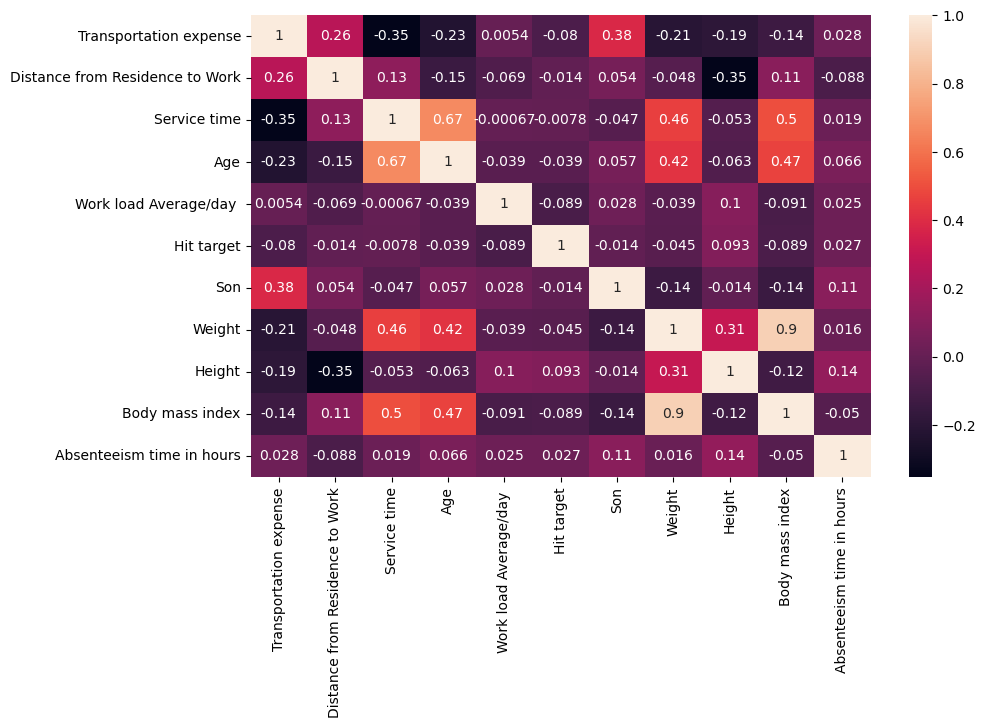

In [31]:
fig,ax =  plt.subplots(figsize=(10,6))
sns.heatmap(df_scaled.corr(),annot = True)
plt.show()

In [32]:
df.dtypes

ID                                    int64
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense                int64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int64
Work load Average/day               float64
Hit target                            int64
Disciplinary failure               category
Education                          category
Son                                   int64
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                                int64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
dtype: object

In [33]:
df.shape

(740, 21)

In [34]:
df_without_id

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Weight,Height,Body mass index,Absenteeism time in hours
0,289,36,13,33,239.554,97,2,90,172,30,4
1,118,13,18,50,239.554,97,1,98,178,31,0
2,179,51,18,38,239.554,97,0,89,170,31,2
3,279,5,14,39,239.554,97,2,68,168,24,4
4,289,36,13,33,239.554,97,2,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...
735,289,36,13,33,264.604,93,2,90,172,30,8
736,235,11,14,37,264.604,93,1,88,172,29,4
737,118,14,13,40,271.219,95,1,98,170,34,0
738,231,35,14,39,271.219,95,2,100,170,35,0


In [35]:


def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(final_df[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        final_df.loc[final_df[col] < lf, col] = int(round(lf))
        final_df.loc[final_df[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        final_df.loc[final_df[col] < lf, col] = lf
        final_df.loc[final_df[col] > uf, col] = uf

In [36]:
for col in final_df.columns:
    outlier_cleanup(col)

In [37]:
def my_vif(x):
    vif = pd.Series(name = "vif")
    for i in range(x.shape[1]):
        vif[x.columns[i]]=variance_inflation_factor(x.values,i)
    return vif

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values = my_vif(df_scaled)
vif_values.sort_values(ascending=False)


Weight                             155.219539
Body mass index                    144.260317
Height                              28.361233
Service time                         2.546584
Age                                  2.347379
Transportation expense               1.587044
Distance from Residence to Work      1.517960
Son                                  1.270541
Absenteeism time in hours            1.047391
Work load Average/day                1.039290
Hit target                           1.035991
Name: vif, dtype: float64

In [39]:
final_df.shape

(740, 21)

C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\2565754598.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_group', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')
C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\2565754598.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_group', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')


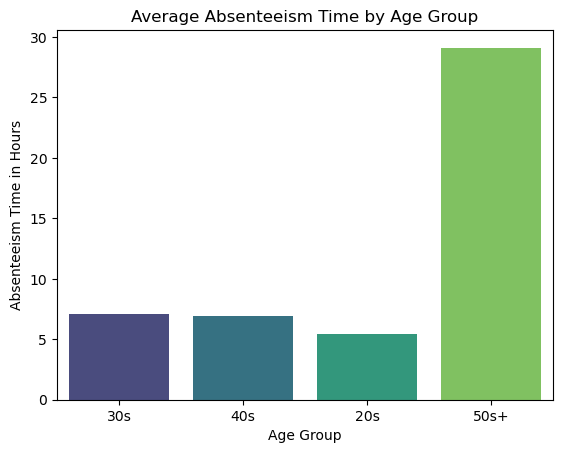

In [120]:
# TASK2_AGE
import matplotlib.pyplot as plt
import seaborn as sns
def age_group(age):
    if age <= 30:
        return '20s'
    elif age <= 40:
        return '30s'
    elif age <= 50:
        return '40s'
    else:
        return '50s+'

df['Age_group'] = df['Age'].apply(age_group)

sns.barplot(x='Age_group', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')
plt.title("Average Absenteeism Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Absenteeism Time in Hours")
plt.show();

In [41]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Age_group'],
      dtype='object')

In [42]:
df.dtypes

ID                                    int64
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense                int64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int64
Work load Average/day               float64
Hit target                            int64
Disciplinary failure               category
Education                          category
Son                                   int64
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                                int64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
Age_group                            object
dtype: object

In [43]:
numerical

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Weight,Height,Body mass index,Absenteeism time in hours
0,11,289,36,13,33,239.554,97,2,90,172,30,4
1,36,118,13,18,50,239.554,97,1,98,178,31,0
2,3,179,51,18,38,239.554,97,0,89,170,31,2
3,7,279,5,14,39,239.554,97,2,68,168,24,4
4,11,289,36,13,33,239.554,97,2,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,289,36,13,33,264.604,93,2,90,172,30,8
736,1,235,11,14,37,264.604,93,1,88,172,29,4
737,4,118,14,13,40,271.219,95,1,98,170,34,0
738,8,231,35,14,39,271.219,95,2,100,170,35,0


In [44]:
category

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker,Pet
0,27,5,3,2,0,1,1,0,1
1,18,5,3,2,1,1,1,0,0
2,24,5,4,2,0,1,1,0,0
3,7,5,2,2,0,1,1,1,0
4,24,5,2,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
735,8,5,3,2,0,1,1,0,1
736,5,5,3,2,0,3,0,0,1
737,18,12,3,2,0,1,1,0,5
738,18,12,4,0,0,1,1,0,2


C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\1119025300.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')
C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\1119025300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')


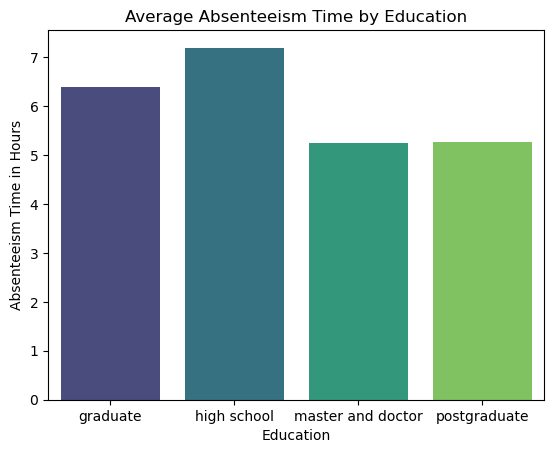

In [122]:
# TASK2
sns.barplot(x='Education', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')
plt.title("Average Absenteeism Time by Education")
plt.xlabel("Education")
plt.ylabel("Absenteeism Time in Hours")
plt.show();

C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\351192748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Son', y='Absenteeism time in hours', data=avg_by_son, palette='viridis')


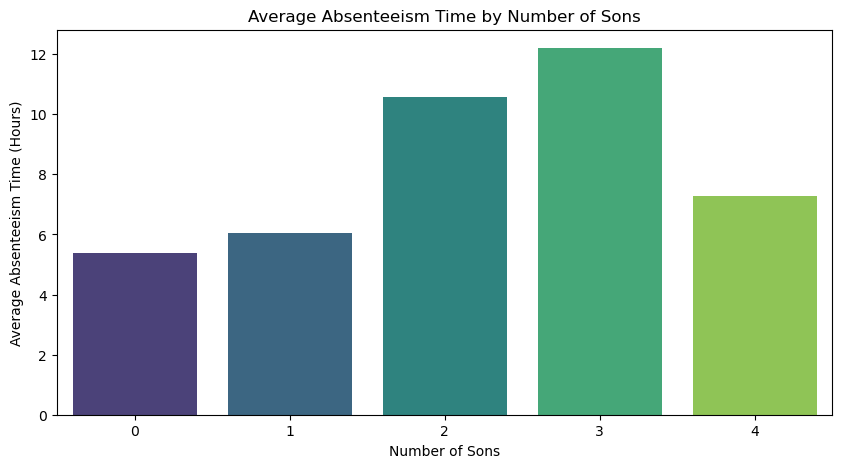

In [124]:
avg_by_son = df.groupby('Son')['Absenteeism time in hours'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Son', y='Absenteeism time in hours', data=avg_by_son, palette='viridis')
plt.title('Average Absenteeism Time by Number of Sons')
plt.xlabel('Number of Sons')
plt.ylabel('Average Absenteeism Time (Hours)')
plt.show();

C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\1193730593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_education = df.groupby('Education')['Absenteeism time in hours'].mean().reset_index()
C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\1193730593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Absenteeism time in hours', data=avg_by_education, palette='Blues_d')


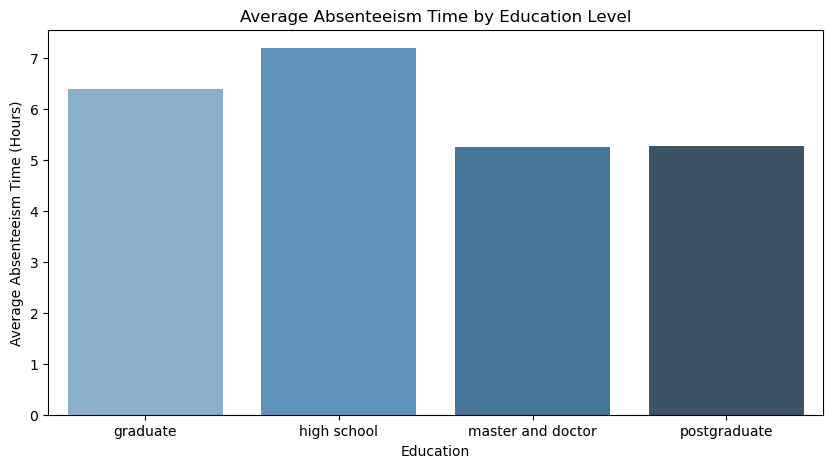

In [90]:
# TASK3
avg_by_education = df.groupby('Education')['Absenteeism time in hours'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Education', y='Absenteeism time in hours', data=avg_by_education, palette='Blues_d')
plt.title('Average Absenteeism Time by Education Level')
plt.xlabel('Education')
plt.ylabel('Average Absenteeism Time (Hours)')
plt.show()


C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\2782932589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absenteeism time in hours', y='ID', data=top10, palette='Blues_d')


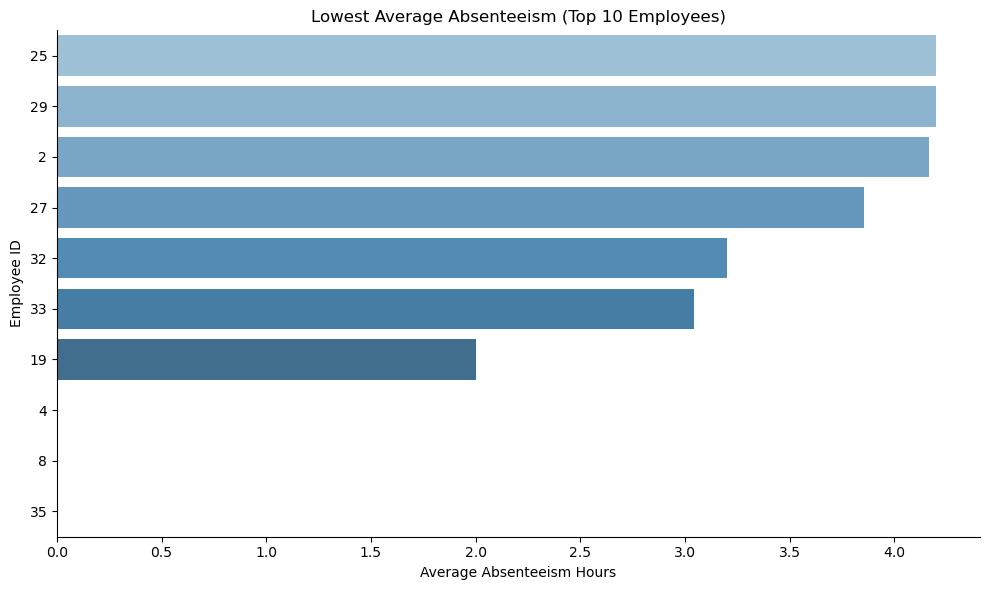

In [156]:
# Get 10 employees with lowest absenteeism
top10 = df.groupby('ID')['Absenteeism time in hours'].mean().nsmallest(10).reset_index()

# Step 2: Convert ID to string and categorical to force correct order and remove gaps
top10['ID'] = top10['ID'].astype(str)
top10['ID'] = pd.Categorical(top10['ID'], categories=top10.sort_values('Absenteeism time in hours', ascending=False)['ID'])

# Step 3: Plot horizontal bar chart without gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='Absenteeism time in hours', y='ID', data=top10, palette='Blues_d')

plt.title("Lowest Average Absenteeism (Top 10 Employees)")
plt.xlabel("Average Absenteeism Hours")
plt.ylabel("Employee ID")
sns.despine()  # Remove axis lines
plt.tight_layout()
plt.show();

C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\4077395690.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absenteeism time in hours', y='ID', data=top10, palette='Blues_d')


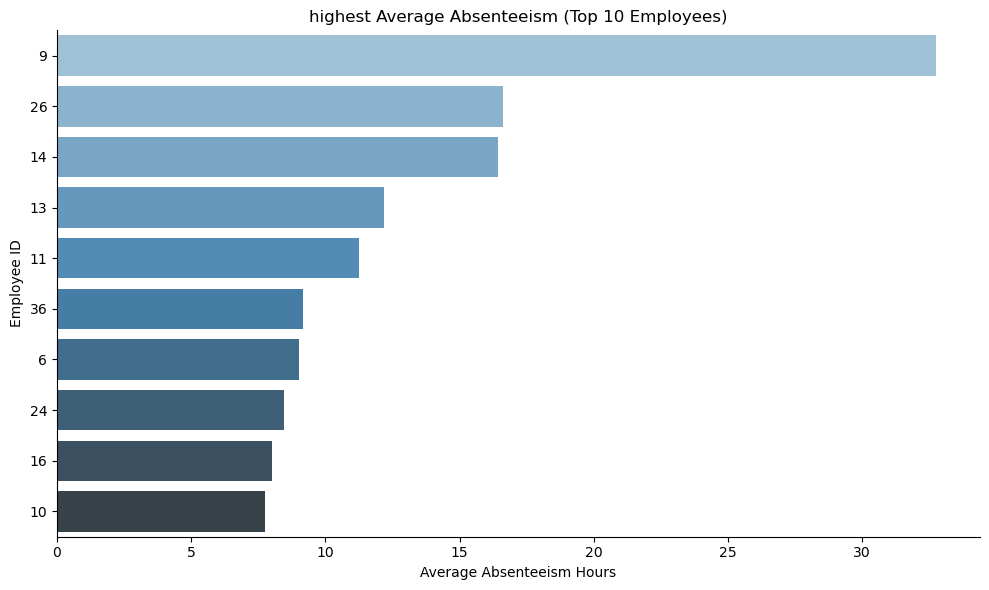

In [158]:
top10 = df.groupby('ID')['Absenteeism time in hours'].mean().nlargest(10).reset_index()

# Step 2: Convert ID to string and categorical to force correct order and remove gaps
top10['ID'] = top10['ID'].astype(str)
top10['ID'] = pd.Categorical(top10['ID'], categories=top10.sort_values('Absenteeism time in hours', ascending=False)['ID'])

# Step 3: Plot horizontal bar chart without gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='Absenteeism time in hours', y='ID', data=top10, palette='Blues_d')

plt.title("highest Average Absenteeism (Top 10 Employees)")
plt.xlabel("Average Absenteeism Hours")
plt.ylabel("Employee ID")
sns.despine()  # Remove axis lines
plt.tight_layout()
plt.show();

C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\4252211792.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Target', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')
C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\4252211792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Target', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')


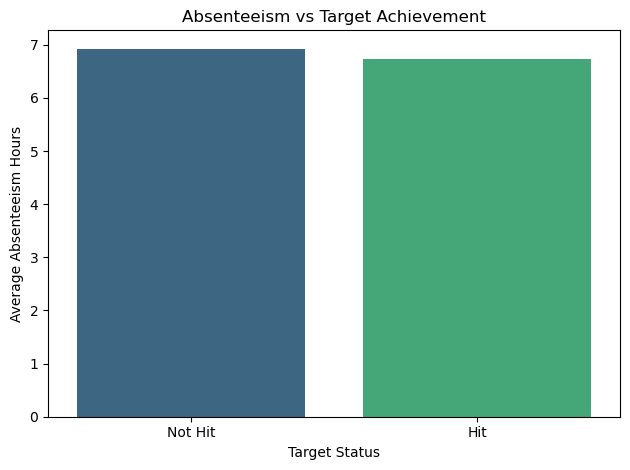

In [178]:
# sns.barplot(x='Hit target', y='Absenteeism time in hours', data=df)
df['Target'] = ['Hit' if x == 100 else 'Not Hit' for x in df['Hit target']]

# Plot
sns.barplot(x='Target', y='Absenteeism time in hours', data=df, ci=None, palette='viridis')
plt.title("Absenteeism vs Target Achievement")
plt.xlabel("Target Status")
plt.ylabel("Average Absenteeism Hours")
plt.tight_layout()
plt.show();

C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\640802160.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top5 = df.groupby('Reason for absence')['Absenteeism time in hours'].mean().sort_values(ascending=False).head(5).reset_index()
C:\Users\akshi\AppData\Local\Temp\ipykernel_2036\640802160.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reason for absence', y='Absenteeism time in hours', data=top5, palette='rocket')


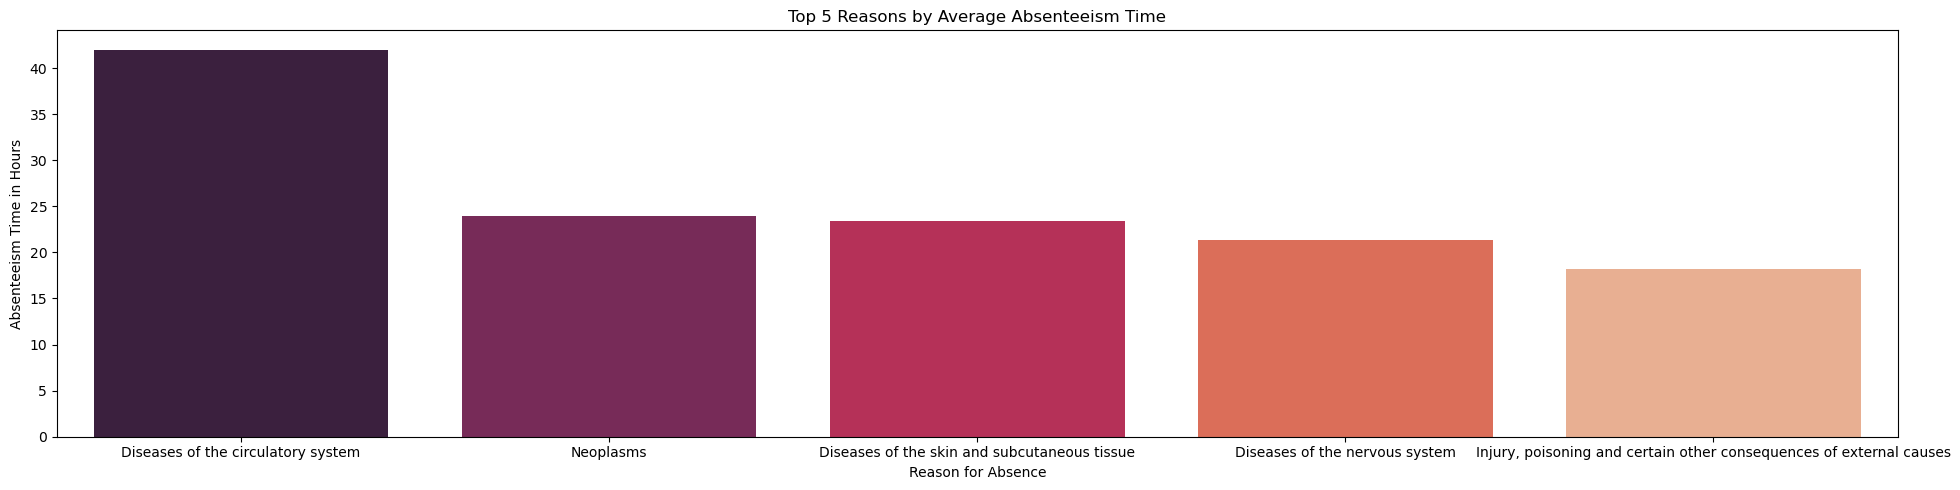

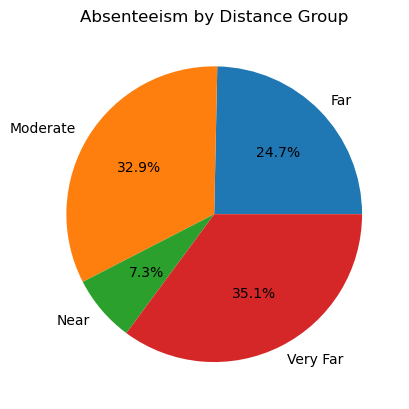

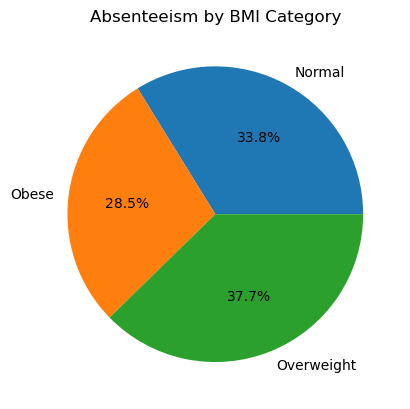

In [130]:
# TASK4


top5 = df.groupby('Reason for absence')['Absenteeism time in hours'].mean().sort_values(ascending=False).head(5).reset_index()

# Step 2: Convert reason numbers to strings to avoid spacing gaps
top5['Reason for absence'] = top5['Reason for absence'].astype(str)

# Step 3: Plot
plt.figure(figsize=(20, 5))
sns.barplot(x='Reason for absence', y='Absenteeism time in hours', data=top5, palette='rocket')
plt.title("Top 5 Reasons by Average Absenteeism Time")
plt.xlabel("Reason for Absence")
plt.ylabel("Absenteeism Time in Hours")
plt.tight_layout()
plt.show();



# Assign distance group directly
df['Distance Group'] = ['Near' if d <= 10 else
                        'Moderate' if d <= 20 else
                        'Far' if d <= 30 else
                        'Very Far' for d in df['Distance from Residence to Work']]

# Pie chart
df.groupby('Distance Group')['Absenteeism time in hours'].sum().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Absenteeism by Distance Group')
plt.show();

# 4. BMI vs absenteeism
# Create BMI categories manually
df['BMI Category'] = ['Underweight' if bmi <= 18.5 else
                      'Normal' if bmi <= 24.9 else
                      'Overweight' if bmi <= 29.9 else
                      'Obese' for bmi in df['Body mass index']]

# Pie chart
df.groupby('BMI Category')['Absenteeism time in hours'].sum().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Absenteeism by BMI Category')
plt.show();


In [49]:
demographics = ["Age","Education","Son","Pet","Social drinker","Social smoker","Weight","Height","Body mass index"]

In [50]:
final_df.shape

(740, 21)

In [51]:
# PROJECT PART2
# TASK1
x = final_df[["Age"]].to_numpy().reshape(-1,1)

In [52]:
# from sklearn.linear_model import LogisticRegression
# Building the model
# logreg = LogisticRegression()
# Training The Model
# logreg.fit(x_train,y_train)

In [53]:
# logreg.score(x_train,y_train)

In [54]:
# y_pred = logreg.predict(x_test)
# y_pred
x = final_df[["Reason for absence","Day of the week","Work load Average/day ","Disciplinary failure","Son","Social drinker"]].to_numpy().reshape(-1,6)

In [55]:
y = final_df["Absenteeism time in hours"].to_numpy().reshape(-1,1)


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
multi_model = LinearRegression().fit(x_train,y_train)
y_pred = multi_model.predict(x_test)

In [58]:
mse_new = mean_squared_error(y_test,y_pred)
mse_new

0.08658263008352388

In [59]:
rmse = root_mean_squared_error(y_test,y_pred) # RMSE
print(rmse)

0.294249265221723


In [60]:
mae = mean_absolute_error(y_test,y_pred) # for mean absolute error
print(mae)

0.2257831968496074


In [61]:
r_square_2 = r2_score(y_test, y_pred)
print(r_square_2)

0.17351188222193936


In [62]:
# KMEANS
import numpy as np
x = np.array(final_df["Absenteeism time in hours"]).reshape(-1,1)

In [63]:
from sklearn.cluster import KMeans
err = []
mycluster = np.arange(2,11)
for k in mycluster:
  temp = KMeans(n_clusters = k)
  temp.fit(x)
  err.append(temp.inertia_)

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [64]:
err

[31.51096134877194,
 3.834877557784077,
 1.2874434748540728,
 0.6493018528814434,
 0.40384693471054334,
 0.3586735128536768,
 0.04092890563408163,
 0.005607625436672332,
 1.348459109862167e-29]

Text(0, 0.5, 'value received from .inertia_')

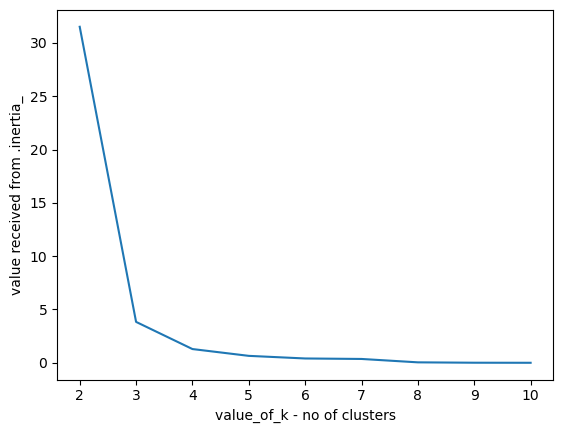

In [65]:
plt.plot(mycluster,err)
plt.xlabel("value_of_k - no of clusters")
plt.ylabel("value received from .inertia_")

In [66]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [67]:
for j in mycluster:
  temp_model = KMeans(n_clusters=j,random_state=0)
  cluster_labels = temp_model.fit_predict(x)
  silhouette_avg = silhouette_score(x,cluster_labels)*100
  print("for clusters  = ",j,"silhouette is", silhouette_avg)
  print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x,temp_model.labels_))
  print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x,temp_model.labels_))
  print()


for clusters  =  2 silhouette is 74.81126343228716
for clusters  =  2 davies_bouldin_score is 0.23069310245049934
for clusters  =  2 calinski_harabasz_score is 1233.3164277938133

for clusters  =  3 silhouette is 84.16224173593442
for clusters  =  3 davies_bouldin_score is 0.141892270345898
for clusters  =  3 calinski_harabasz_score is 7719.620675734026

for clusters  =  4 silhouette is 75.43723185709511
for clusters  =  4 davies_bouldin_score is 0.3293342615762789
for clusters  =  4 calinski_harabasz_score is 13424.614556607441

for clusters  =  5 silhouette is 84.00521890679099
for clusters  =  5 davies_bouldin_score is 0.25356739375261883
for clusters  =  5 calinski_harabasz_score is 26991.838096229454

for clusters  =  6 silhouette is 89.99655375308765
for clusters  =  6 davies_bouldin_score is 0.21393386395749484
for clusters  =  6 calinski_harabasz_score is 30449.639945360057

for clusters  =  7 silhouette is 98.19872857119695
for clusters  =  7 davies_bouldin_score is 0.09052420

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

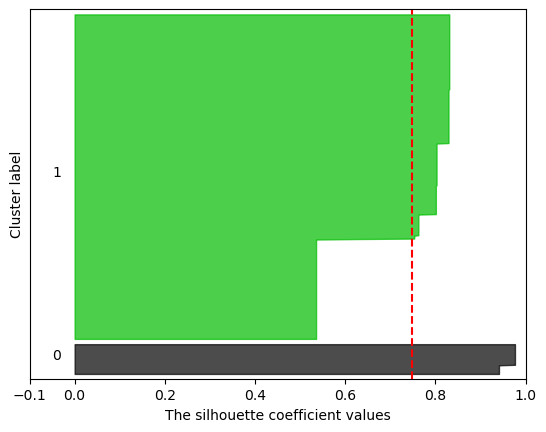

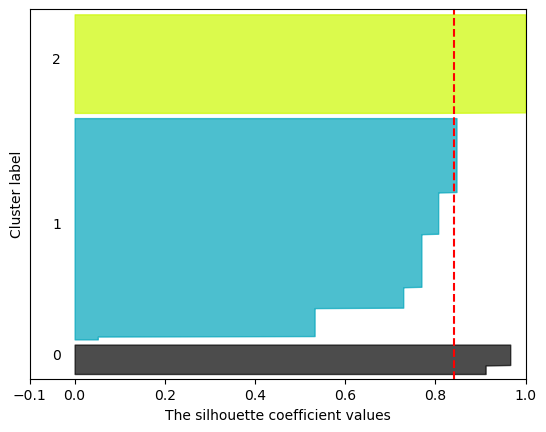

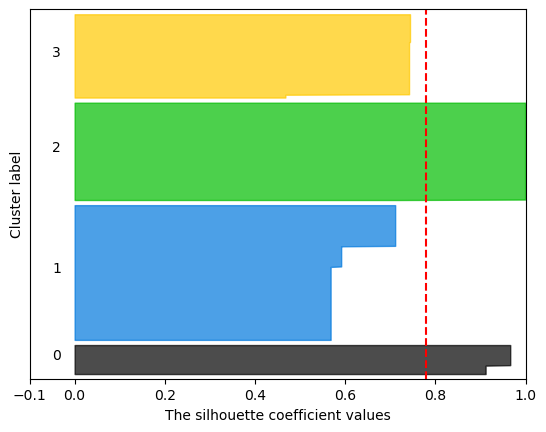

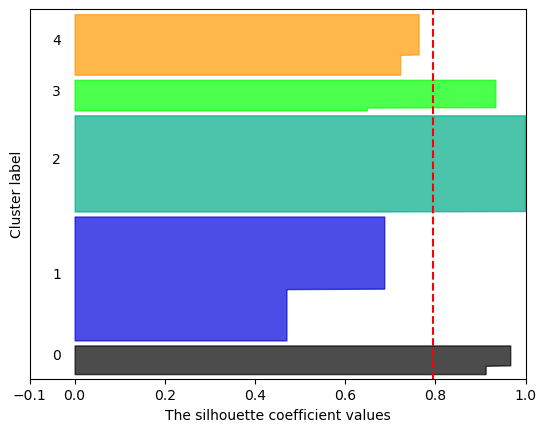

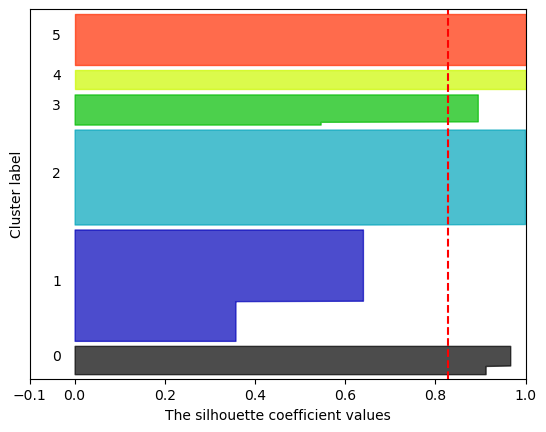

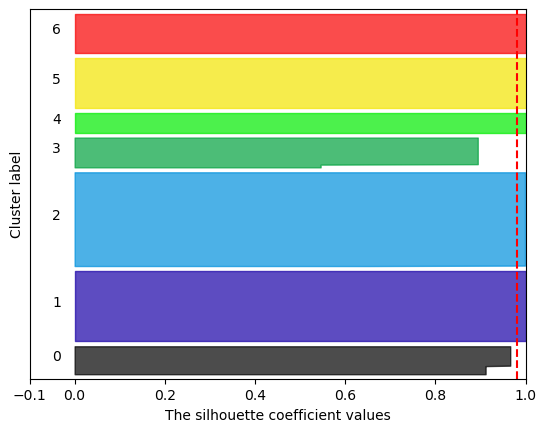

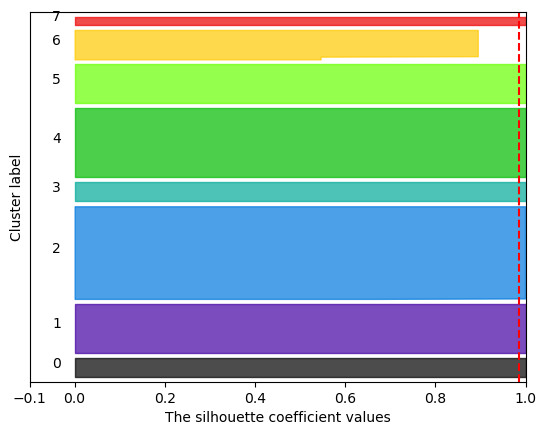

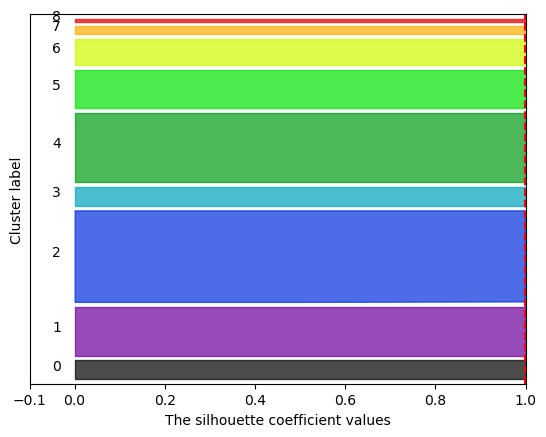

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    sil_avg = silhouette_score(x,cluster_labels)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # axline line is used for treshold
    # axvline kine is used as vertical treshold
plt.show()

In [69]:
final_km = KMeans(n_clusters=2,random_state=0)
final_km.fit(x)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_ # Final model
clusters = final_km.fit_predict(x)
final_df['clusters'] = clusters
label_map = {0:"Rarely absent",
            1:"Frequently absent"}
final_df["cluster_label"] = final_df["clusters"].map(label_map)

C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [70]:
final_df.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours',
       'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker',
       'Pet', 'clusters', 'cluster_label'],
      dtype='object')

In [71]:
j = 2 # No of clusers required are 5
print("for clusters  = ",j,"silhouette is",round(silhouette_score(x,final_km.labels_),2) )
print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x,final_km.labels_))
print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x,final_km.labels_))
print() # to finalize, we need to check all performances with a priority given to visuals

for clusters  =  2 silhouette is 0.75
for clusters  =  2 davies_bouldin_score is 0.23069310245049934
for clusters  =  2 calinski_harabasz_score is 1233.3164277938133



In [72]:
final_df.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours',
       'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker',
       'Pet', 'clusters', 'cluster_label'],
      dtype='object')

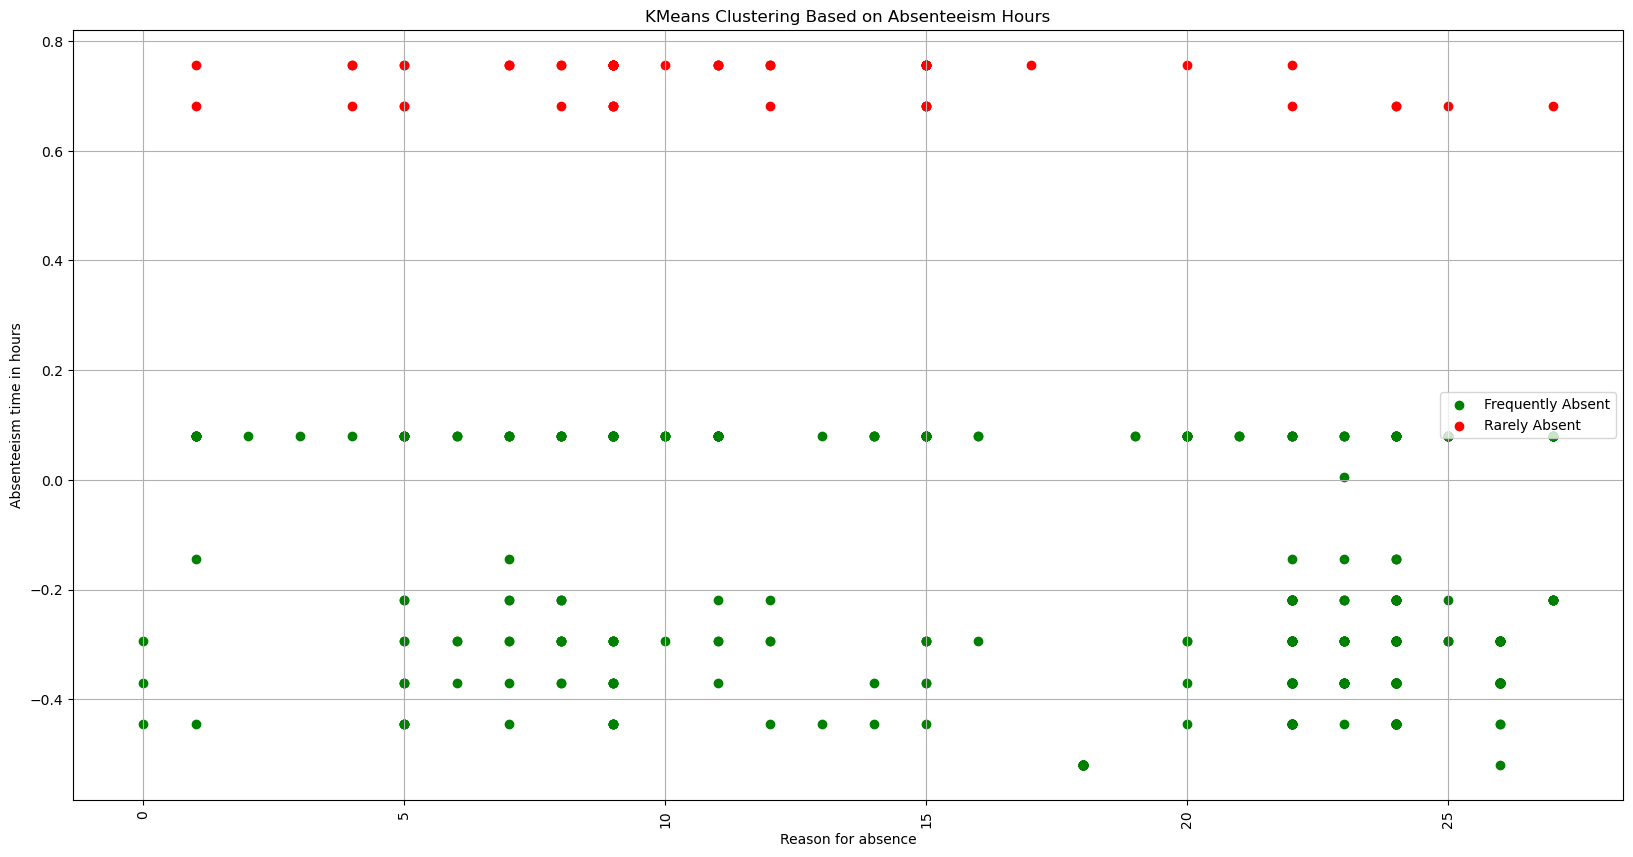

In [182]:
segments = ["Frequently Absent","Rarely Absent"]
colors = ["Green","red"]


# Step 2: Apply KMeans

# Step 3: Plot
plt.figure(figsize=(20, 10))
for i in range(2):
    plt.scatter(final_df.loc[(final_df.clusters==i),'Reason for absence'],final_df.loc[(final_df.clusters==i),'Absenteeism time in hours'],c=colors[i],label=segments[i])
plt.xlabel("Reason for absence" )
plt.xticks(rotation = 90)
plt.ylabel("Absenteeism time in hours")
plt.title("KMeans Clustering Based on Absenteeism Hours")
plt.legend(loc = "center right")
plt.grid(True)

In [ ]:
final_df.to_excel("output_file.xlsx", index=False)

In [ ]:
final_df

In [ ]:
final_df.shape

In [ ]:
x = final_df[['Age','Son','Distance from Residence to Work','Reason for absence']].to_numpy().reshape(-1,4)

In [ ]:
y = np.array(final_df['cluster_label']).reshape(-1,1)

In [ ]:
y_numeric = np.where(y == 'Rarely absent', 1, 0)

In [ ]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x,y_numeric,train_size = 0.7,random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Building the model
logreg = LogisticRegression()
# Training The Model
logreg.fit(x_train1,y_train1)

In [ ]:
logreg.score(x_train1,y_train1)

In [ ]:
y_pred1 = logreg.predict(x_test1)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1,y_pred1))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1,y_pred1))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test1,y_pred1,average = "weighted"))

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test1,logreg.predict_proba(x_test1)[:,1]))

In [ ]:
y_probas = logreg.predict_proba(x_test1)
y_probas

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from matplotlib import pyplot

In [ ]:
lr_probs = logreg.predict_proba(x_test1)
ns_probs = [0 for _ in range(len(y_test1))]

In [ ]:
lr_probs = y_probas[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test1, ns_probs)
lr_auc = roc_auc_score(y_test1, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test1, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)

print("Precision:", precision)
print("Recall:", recall)

In [ ]:
#KNN
x2 = final_df[['Age','Son','Distance from Residence to Work','Reason for absence']].to_numpy().reshape(-1,4)

In [ ]:
y2 = np.array(final_df['cluster_label']).reshape(-1,1)

In [ ]:
y_numeric2 = np.where(y == 'Rarely absent', 1, 0)

In [ ]:
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(x2,y_numeric2,train_size = 0.8,random_state = 42)
print(x_tr2.shape)
print(y_tr2.shape)
print(x_te2.shape)
print(y_te2.shape)

In [ ]:
n = int(round(len(x_tr2)**0.5,0))
n

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

acc = []
k_values = np.arange(2,40,4)
for myk2 in k_values:
    temp = KNeighborsClassifier(myk2)
    temp.fit(x_tr2,y_tr2)
    y_pr2 = temp.predict(x_te2)
    acc.append(accuracy_score(y_te2,y_pr2))
print(acc)
print(k_values)

In [ ]:
plt.plot(k_values, acc)

In [ ]:
final_model = KNeighborsClassifier(9)

final_model.fit(x_tr2,y_tr2)
print(final_model.score(x_tr2,y_tr2)) # Training model performance
y_pred2 = final_model.predict(x_te2)
print(accuracy_score(y_te2,y_pred2))

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_te2, y_pred2)
f1